In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/semensorokin/SNA_2021/master/week2/hero-network.csv

--2020-09-23 20:33:34--  https://raw.githubusercontent.com/semensorokin/SNA_2021/master/week2/hero-network.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22222596 (21M) [text/plain]
Saving to: ‘hero-network.csv’

hero-network.csv    100%[===================>]  21.19M  33.0MB/s    in 0.6s    

2020-09-23 20:33:35 (33.0 MB/s) - ‘hero-network.csv’ saved [22222596/22222596]



In [3]:
hero_network = pd.read_csv("./hero-network.csv")

Познакомимся с данными

In [4]:
hero_network.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [5]:
hero_network.shape

(574467, 2)

Уберем дубликаты 

In [6]:
hero_network_dd = hero_network.drop_duplicates()

In [7]:
hero_network_dd.shape

(224181, 2)

Количество героев (будущих вершин в графе) 

In [8]:
len(set(hero_network_dd['hero2'].unique().tolist()) | set(hero_network_dd['hero1'].unique().tolist()))

6426

Возьмкм только часть данных, чтобы лучше познакомиться с интерфейсом networkx

In [9]:
net = nx.Graph()

In [10]:
for line in hero_network_dd.iterrows():
    net.add_edge(*line[1].values)

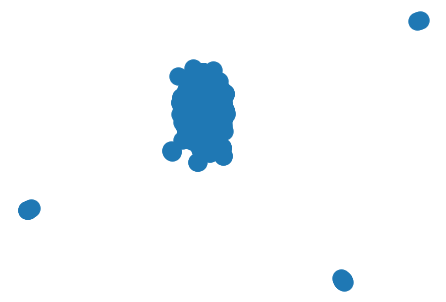

In [11]:
nx.draw(net)

In [12]:
print("Number of nodes: {}".format(len(net.nodes())))

Number of nodes: 6426


In [13]:
print("Number of edges: {}".format(len(net.edges())))

Number of edges: 167219


In [14]:
print("Average degree of nodes: {0:.2f}".format(len(net.edges())/len(net.nodes())))

Average degree of nodes: 26.02


In [15]:
print("Connected graph - {}".format(nx.is_connected(net)))

Connected graph - False


In [16]:
largest_cc = max(nx.connected_components(net), key=len)

In [17]:
small_net = net.subgraph(max(nx.connected_components(net), key=len))

In [18]:
print("Number of nodes: {}".format(len(small_net.nodes())))
print("Number of edges: {}".format(len(small_net.edges())))
print("Average degree of nodes: {0:.2f}".format(len(net.edges())/len(net.nodes())))

Number of nodes: 6408
Number of edges: 167163
Average degree of nodes: 26.02


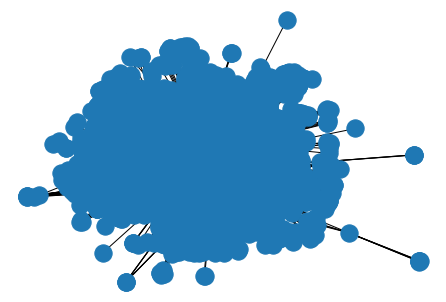

In [19]:
nx.draw(small_net)

In [20]:
print("Density : {0:.3f}".format(nx.density(small_net)))

Density : 0.008


In [21]:
degree_view = nx.degree(small_net)

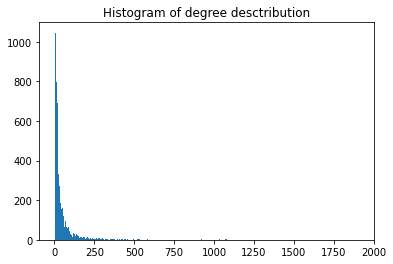

In [22]:
degree_values = dict(degree_view).values()
plt.hist([i for i in list(degree_values)], bins = len(set(degree_values)))
plt.title("Histogram of degree desctribution")
plt.show()

In [23]:
from collections import Counter
res = Counter(list(dict(degree_view).values()))

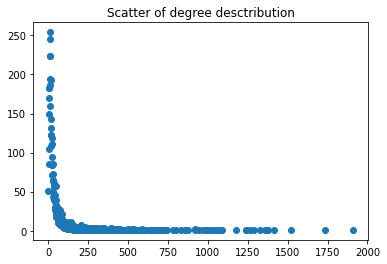

In [24]:
plt.title("Scatter of degree desctribution")
plt.scatter(res.keys(), res.values())
plt.show()

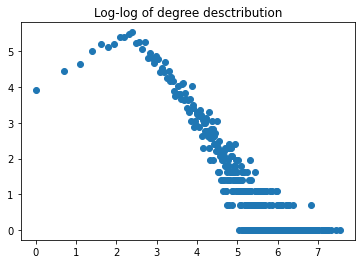

In [25]:
import math
plt.title("Log-log of degree desctribution")
plt.scatter([math.log(i) for i in res.keys()], [math.log(i) for i in res.values()])
plt.show()

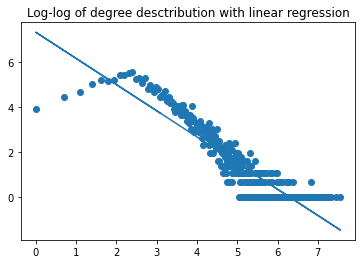

In [26]:
import numpy as np
x = np.array([math.log(i) for i in res.keys()])
y = np.array([math.log(i) for i in res.values()])
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.title("Log-log of degree desctribution with linear regression")
plt.show()